# Contents
1. [Setup](#Setup)
2. [Data Validation](#Data-Validation)
3. [EDA](#EDA)

# Setup

#### Import Libraries

In [46]:
# File and OS handling
import os
import PyPDF2

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Other utilities
from collections import Counter

#### Reading Data

In [33]:
# Function to extract text from the PDF
def extract_words_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
        
        # Clean the text and split it into words
        words = text.split()
        return words

# Extract words from the PDF
pdf_path = 'bip_39_wordlist_revb.pdf'
words = extract_words_from_pdf(pdf_path)

# Print the first few words to check
print(words[:20])

['abandon', 'ability', 'able', 'about', 'above', 'absent', 'absorb', 'abstract', 'absurd', 'abuse', 'access', 'accident', 'account', 'accuse', 'achieve', 'acid', 'acoustic', 'acquire', 'across', 'act']


[Back to the top](#Contents)

# Data Validation

#### Validating Word List Size 
Check if the BIP-39 word list contains exactly 2048 words. If the size does not match, it raises an error. This ensures the integrity of the list size before proceeding to any further checks.

In [51]:
def validate_word_list_size(words):
    """
    Validates that the BIP-39 word list contains exactly 2048 words.
    
    Raises:
        ValueError: If the word list does not contain exactly 2048 words.
    """
    expected_size = 2048
    actual_size = len(words)
    
    if actual_size != expected_size:
        raise ValueError(f"Word list size validation failed. Expected {expected_size} words, but got {actual_size}.")
    
    print(f"Validation passed: Word list contains exactly {actual_size} words.")

validate_word_list_size(words)

Validation passed: Word list contains exactly 2048 words.


#### Word List Uniqueness
- The function validate_word_list_uniqueness ensures that all words in the BIP-39 word list are unique. 
- If any duplicates are found, it raises an error, helping to confirm the integrity of the word list.

In [52]:
def validate_word_list_uniqueness(words):
    """
    Validates that all words in the BIP-39 word list are unique.
    
    Raises:
        ValueError: If there are duplicate words in the word list.
    """
    unique_words = set(words)
    if len(unique_words) != len(words):
        raise ValueError(f"Word list uniqueness validation failed. Found {len(words) - len(unique_words)} duplicates.")
    
    print(f"Validation passed: All {len(words)} words are unique.")
validate_word_list_uniqueness(words)

Validation passed: All 2048 words are unique.


#### Validating Unique First Four Letters
This checks that each word in the BIP-39 word list is unique based on its first four letters. If duplicates are found in the first four letters of any words, it raises an error.

In [54]:
def validate_unique_first_four_letters(words):
    """
    Validates that each word in the BIP-39 word list is unique based on its first four letters.
    
    Raises:
        ValueError: If any two words have the same first four letters.
    """
    # Extract first four letters of each word
    first_four_letters = [word[:4] for word in words]
    
    # Convert to a set to remove duplicates and compare lengths
    unique_first_four_letters = set(first_four_letters)
    
    if len(unique_first_four_letters) != len(words):
        duplicates = len(words) - len(unique_first_four_letters)
        raise ValueError(f"Validation failed: Found {duplicates} words with duplicate first four letters.")
    
    print(f"Validation passed: All words have unique first four letters.")

validate_unique_first_four_letters(words)

Validation passed: All words have unique first four letters.


### Validating Alphabetical Order
- Checks if the words in the BIP-39 word list are in alphabetical order. 
- If they are not, it raises an error specifying that the list is not sorted.

In [56]:
def validate_alphabetical_order(words):
    """
    Validates that the BIP-39 word list is in alphabetical order.
    
    Raises:
        ValueError: If the words are not in alphabetical order.
    """
    # Check if the list is sorted
    if words != sorted(words):
        raise ValueError("Validation failed: Word list is not in alphabetical order.")
    
    print("Validation passed: Word list is in alphabetical order.")

# Example usage
validate_alphabetical_order(words)

Validation passed: Word list is in alphabetical order.


[Back to the top](#Contents)

# EDA

### Word Length Distribution
- Understanding the distribution of word lengths can help identify if there are any patterns or biases in the seed words, which might affect user recall or recognition. 
- Additionally, most words in the list are between 4 and 8 letters long. This ensures that they are not too short (which could be harder to distinguish) or too long (which could be difficult to remember).

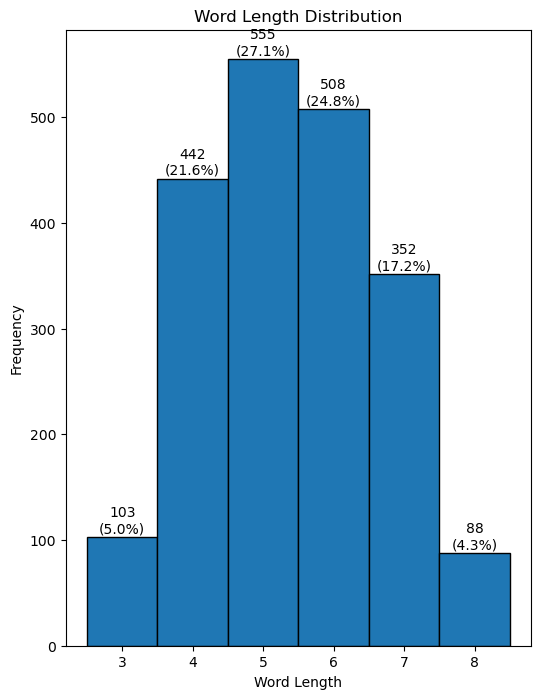

In [29]:
# Calculate word lengths
word_lengths = [len(word) for word in words]

# Create a DataFrame for visualization
df_lengths = pd.DataFrame({'word': words, 'length': word_lengths})

# Plot distribution
# Calculate total words for percentage
total_words = len(df_lengths)

# Set bin edges
bins = np.arange(min(df_lengths['length']) - 0.5, max(df_lengths['length']) + 1.5, 1)
plt.figure(figsize=(6, 8)) 

# Plot histogram with counts
counts, bins, patches = plt.hist(df_lengths['length'], bins=bins, edgecolor='black')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

# Annotate with count and percentage
for count, patch in zip(counts, patches):
    height = patch.get_height()
    percentage = (count / total_words) * 100
    plt.annotate(f'{int(count)}\n({percentage:.1f}%)', xy=(patch.get_x() + patch.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center')

# Set consistent x-ticks
plt.xticks(np.arange(min(word_lengths), max(word_lengths) + 1, 1))

plt.show()


[Back to the top](#Contents)

### Word Frequency Analysis
`Motivation`: Analyzing the starting letter of each word helps identify biases in the first letter, which could lead to easier or more difficult recall for users.





<Figure size 1200x1200 with 0 Axes>

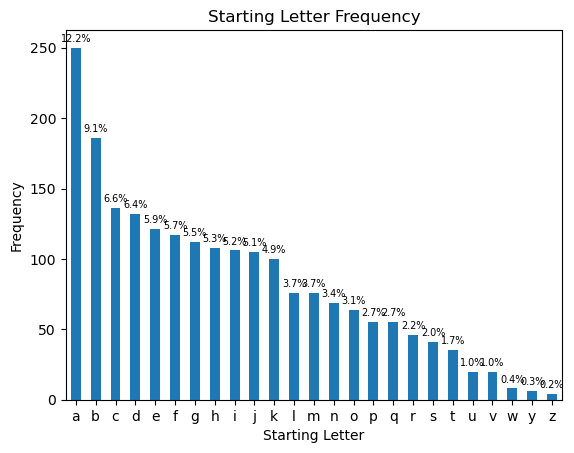

In [42]:
# Get first letter of each word
first_letters = [word[0] for word in words]

# Count occurrences of each letter
letter_counts = Counter(first_letters)

# Convert to DataFrame for visualization
df_letters = pd.DataFrame(list(letter_counts.items()), columns=['letter', 'count'])

# Calculate total number of words for percentage
total_words = sum(letter_counts.values())

# Create a larger figure size
plt.figure(figsize=(12, 12))  # Increase width and height of the canvas

# Plot the counts of starting letters
ax = df_letters.sort_values(by='count', ascending=False).plot(kind='bar', x='letter', y='count', legend=False)
plt.title('Starting Letter Frequency')
plt.xlabel('Starting Letter')
plt.ylabel('Frequency')

# Annotate with percentages on top of bars
for p in ax.patches:
    percentage = (p.get_height() / total_words) * 100  # Calculate percentage
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontsize=7)  # Smaller font size

# Set x-tick labels with no rotation
ax.set_xticklabels(df_letters['letter'], rotation=0)

# Show plot
plt.show()


[Back to the top](#Contents)

### Jaccard Distance

# 99 Stray Codes

In [49]:
# ls -l /Users/ashrithreddy/Documents/bitcoin_utils/data/bip_39_wordlist_revb.pdf
# import os
# os.getcwd()

# pdf_path = os.path.join(os.path.expanduser("~"), 'Documents', 'bitcoin_utils', 'data', 'bip_39_wordlist_revb.pdf')
# pdf_path
# pdf_path = '/Users/ashrithreddy/Documents/bitcoin_utils/data/bip_39_wordlist_revb.pdf'
# /Users/ashrithreddy/Documents/bitcoin_utils/data/

In [50]:
# os.getcwd()